## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

       amount      type       time
0  224.835708  purchase  17.475438
1  193.086785    refund   2.657940
2  232.384427  purchase   2.638905
3  276.151493    refund   1.278495
4  188.292331  purchase  22.999532
       amount  type       time  anomaly  is_anomaly
0  224.835708     1  17.475438        1       False
1  193.086785    -1   2.657940        1       False
2  232.384427     1   2.638905        1       False
3  276.151493    -1   1.278495        1       False
4  188.292331     1  22.999532        1       False


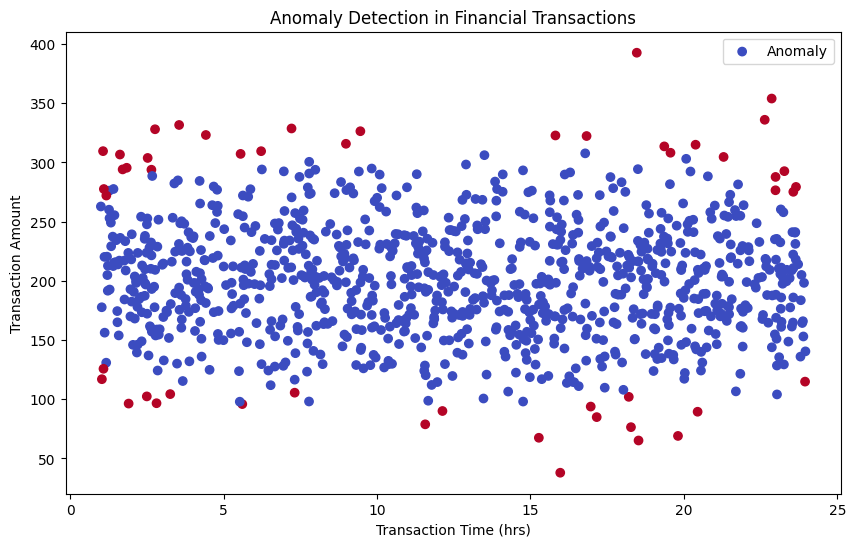

In [1]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
# Example dataset: Simulating some financial transactions
# For simplicity, creating a random dataset of transactions
np.random.seed(42)

# Simulating features: transaction amount, transaction type, and transaction time
n_samples = 1000
amount = np.random.normal(200, 50, n_samples)  # Normally distributed transaction amounts
type = np.random.choice(['purchase', 'refund'], n_samples)  # Randomly assign purchase or refund
time = np.random.uniform(1, 24, n_samples)  # Simulating transaction time in hours

# Creating a DataFrame
df = pd.DataFrame({
    'amount': amount,
    'type': type,
    'time': time
})

# Display the first few rows of the dataset
print(df.head())
# Convert 'type' to numerical values
df['type'] = df['type'].map({'purchase': 1, 'refund': -1})

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model to the data (excluding categorical data transformed into numeric form)
df_features = df[['amount', 'type', 'time']]
df['anomaly'] = iso_forest.fit_predict(df_features)

# Mark anomalies (where prediction is -1)
df['is_anomaly'] = df['anomaly'] == -1

# Display the result
print(df.head())
# Plotting the anomalies
plt.figure(figsize=(10, 6))

# Scatter plot for transactions
plt.scatter(df['time'], df['amount'], c=df['is_anomaly'], cmap='coolwarm', label="Anomaly" if True else "Normal")
plt.title("Anomaly Detection in Financial Transactions")
plt.xlabel("Transaction Time (hrs)")
plt.ylabel("Transaction Amount")
plt.legend(loc="best")

# Display the plot
plt.show()
